<a href="https://colab.research.google.com/github/Santidnp/Certificados/blob/master/PCA_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show plotly

Name: plotly
Version: 5.15.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, tenacity
Required-by: cufflinks, datascience, geemap


In [ ]:
# prompt: import .xlsx file

import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/PCA/Indice_pruebas_mejora.xlsx')
df = df.fillna(0)

df1 = pd.read_excel('/content/drive/MyDrive/PCA/Divipola 1.xlsx')
df1 = df1.fillna(0)


In [ ]:
df.head()

,AÑO,CODIGO_DANE,POBLACION,DELITOS SEXUALES,HOMICIDIO,HOMICIDIO ACCIDENTE TRANSITO,HURTO A PERSONAS,HURTO COMERCIO,HURTO ENTIDADES FINANCIERAS,HURTO RESIDENCIAS,HURTO VEHICULOS,LESIONES ACCIDENTES TRANSITO,LESIONES PERSONALES,VIOLENCIA INTRAFAMILIAR,Num13_ConsumoyporteSPA,Num2_IncumplirordenPolicía,Num6_Portararmas,Num8_PorteSustanciasProhibidas,Otros
0,2017,5001,2385018,70.4,24.0,9.9,747.4,184.5,0.5,75.7,210.6,137.0,262.6,311.7,0.0,22.6,23.8,74.2,279.6
1,2017,5002,20437,78.3,9.8,19.6,93.0,39.1,0.0,122.3,29.4,9.8,190.8,127.2,0.0,0.0,234.9,4.9,102.8
2,2017,5004,2652,75.4,37.7,0.0,0.0,0.0,0.0,75.4,0.0,0.0,0.0,75.4,0.0,0.0,37.7,0.0,150.8
3,2017,5021,4600,0.0,43.5,0.0,43.5,87.0,0.0,108.7,65.2,21.7,173.9,239.1,0.0,0.0,326.1,173.9,652.2
4,2017,5030,29663,111.2,43.8,13.5,111.2,84.3,0.0,64.1,43.8,47.2,438.3,219.1,0.0,30.3,87.7,13.5,232.6


In [ ]:
set(list(df['AÑO']))

{2017, 2018, 2019, 2020, 2021, 2022, 2023}

In [ ]:
df1.head()

,Divipola_dep,Divipola_mun,Código Centro Poblado,Nombre Departamento,Nombre Municipio,Nombre Centro Poblado,Tipo Centro Poblado,Longitud,Latitud
0,5,5001,5001000,ANTIOQUIA,MEDELLÍN,MEDELLÍN,CABECERA MUNICIPAL (CM),-75.576002,6.248586
1,5,5002,5002000,ANTIOQUIA,ABEJORRAL,ABEJORRAL,CABECERA MUNICIPAL (CM),-75.428740,5.789301
2,5,5004,5004000,ANTIOQUIA,ABRIAQUÍ,ABRIAQUÍ,CABECERA MUNICIPAL (CM),-76.064295,6.632282
3,5,5021,5021000,ANTIOQUIA,ALEJANDRÍA,ALEJANDRÍA,CABECERA MUNICIPAL (CM),-75.141335,6.376063
4,5,5030,5030000,ANTIOQUIA,AMAGÁ,AMAGÁ,CABECERA MUNICIPAL (CM),-75.701948,6.038808


In [ ]:
df1=df1[['Divipola_mun','Nombre Departamento', 'Nombre Municipio']]
df1 = df1.rename(columns={'Divipola_mun': 'CODIGO_DANE'})

df1.head()

,CODIGO_DANE,Nombre Departamento,Nombre Municipio
0,5001,ANTIOQUIA,MEDELLÍN
1,5002,ANTIOQUIA,ABEJORRAL
2,5004,ANTIOQUIA,ABRIAQUÍ
3,5021,ANTIOQUIA,ALEJANDRÍA
4,5030,ANTIOQUIA,AMAGÁ


In [ ]:
import pandas as pd

# Unir los DataFrames en función de la columna 'codigo_especial'
df_merged = pd.merge(df, df1, on='CODIGO_DANE', how='left')

df_merged


,AÑO,CODIGO_DANE,POBLACION,DELITOS SEXUALES,HOMICIDIO,HOMICIDIO ACCIDENTE TRANSITO,HURTO A PERSONAS,HURTO COMERCIO,HURTO ENTIDADES FINANCIERAS,HURTO RESIDENCIAS,...,LESIONES ACCIDENTES TRANSITO,LESIONES PERSONALES,VIOLENCIA INTRAFAMILIAR,Num13_ConsumoyporteSPA,Num2_IncumplirordenPolicía,Num6_Portararmas,Num8_PorteSustanciasProhibidas,Otros,Nombre Departamento,Nombre Municipio
0,2017,5001,2385018,70.4,24.0,9.9,747.4,184.5,0.5,75.7,...,137.0,262.6,311.7,0.0,22.6,23.8,74.2,279.6,ANTIOQUIA,MEDELLÍN
1,2017,5002,20437,78.3,9.8,19.6,93.0,39.1,0.0,122.3,...,9.8,190.8,127.2,0.0,0.0,234.9,4.9,102.8,ANTIOQUIA,ABEJORRAL
2,2017,5004,2652,75.4,37.7,0.0,0.0,0.0,0.0,75.4,...,0.0,0.0,75.4,0.0,0.0,37.7,0.0,150.8,ANTIOQUIA,ABRIAQUÍ
3,2017,5021,4600,0.0,43.5,0.0,43.5,87.0,0.0,108.7,...,21.7,173.9,239.1,0.0,0.0,326.1,173.9,652.2,ANTIOQUIA,ALEJANDRÍA
4,2017,5030,29663,111.2,43.8,13.5,111.2,84.3,0.0,64.1,...,47.2,438.3,219.1,0.0,30.3,87.7,13.5,232.6,ANTIOQUIA,AMAGÁ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,2023,97666,2543,196.6,39.3,0.0,0.0,0.0,0.0,39.3,...,0.0,157.3,196.6,0.0,0.0,39.3,0.0,157.3,VAUPÉS,TARAIRA
7672,2023,99001,22218,99.0,36.0,9.0,270.1,81.0,0.0,252.0,...,4.5,310.6,193.5,94.5,778.6,985.7,180.0,1296.2,VICHADA,PUERTO CARREÑO
7673,2023,99524,10992,27.3,9.1,9.1,45.5,9.1,0.0,81.9,...,18.2,81.9,300.2,45.5,18.2,336.6,18.2,527.7,VICHADA,LA PRIMAVERA
7674,2023,99624,4555,87.8,22.0,43.9,65.9,0.0,0.0,65.9,...,0.0,87.8,87.8,153.7,175.6,197.6,0.0,307.4,VICHADA,SANTA ROSALÍA


In [ ]:
df_p1 = df_merged.to_excel('/content/drive/MyDrive/PCA/MFA_1.xlsx')

In [ ]:
# prompt: extract column names of a dataframe

column_names = df_merged.columns.tolist()
print(column_names)


['AÑO', 'CODIGO_DANE', 'POBLACION', 'DELITOS SEXUALES', 'HOMICIDIO', 'HOMICIDIO ACCIDENTE TRANSITO', 'HURTO A PERSONAS', 'HURTO COMERCIO', 'HURTO ENTIDADES FINANCIERAS', 'HURTO RESIDENCIAS', 'HURTO VEHICULOS', 'LESIONES ACCIDENTES TRANSITO', 'LESIONES PERSONALES', 'VIOLENCIA INTRAFAMILIAR', 'Num13_ConsumoyporteSPA', 'Num2_IncumplirordenPolicía', 'Num6_Portararmas', 'Num8_PorteSustanciasProhibidas', 'Otros', 'Nombre Departamento', 'Nombre Municipio']


In [ ]:
df_final = df_merged.copy()  # Crear una copia del DataFrame original
columnas_a_quitar = ['AÑO', 'CODIGO_DANE','Nombre Departamento','Nombre Municipio']  # Lista de nombres de columnas a quitar
df_final = df_final.drop(columns=columnas_a_quitar)  # Quitar las columnas especificadas


In [ ]:
df_final.head()

,POBLACION,DELITOS SEXUALES,HOMICIDIO,HOMICIDIO ACCIDENTE TRANSITO,HURTO A PERSONAS,HURTO COMERCIO,HURTO ENTIDADES FINANCIERAS,HURTO RESIDENCIAS,HURTO VEHICULOS,LESIONES ACCIDENTES TRANSITO,LESIONES PERSONALES,VIOLENCIA INTRAFAMILIAR,Num13_ConsumoyporteSPA,Num2_IncumplirordenPolicía,Num6_Portararmas,Num8_PorteSustanciasProhibidas,Otros
0,2385018,70.4,24.0,9.9,747.4,184.5,0.5,75.7,210.6,137.0,262.6,311.7,0.0,22.6,23.8,74.2,279.6
1,20437,78.3,9.8,19.6,93.0,39.1,0.0,122.3,29.4,9.8,190.8,127.2,0.0,0.0,234.9,4.9,102.8
2,2652,75.4,37.7,0.0,0.0,0.0,0.0,75.4,0.0,0.0,0.0,75.4,0.0,0.0,37.7,0.0,150.8
3,4600,0.0,43.5,0.0,43.5,87.0,0.0,108.7,65.2,21.7,173.9,239.1,0.0,0.0,326.1,173.9,652.2
4,29663,111.2,43.8,13.5,111.2,84.3,0.0,64.1,43.8,47.2,438.3,219.1,0.0,30.3,87.7,13.5,232.6


In [ ]:
# prompt: PCA Analysis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Standardize the data
#df_scaled = df_final.copy()
#df_scaled -= df_scaled.mean(axis=0)
#df_scaled /= df_scaled.std(axis=0)
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(df_final)
scaler = MinMaxScaler(feature_range=(0,1))
datos_escalados = scaler.fit_transform(df_final)

df_scaled = pd.DataFrame(datos_escalados, columns=list(df_final.columns))


# Perform PCA
pca = PCA(n_components=2)
pca.fit(df_scaled)

# Get the principal components
principal_components = pca.components_

# Get the explained variance
explained_variance = pca.explained_variance_ratio_

# Print the results
print("Principal components:")
print(principal_components)
print("\nExplained variance:")
print(explained_variance)


Principal components:
[[ 0.04646209  0.30361294 -0.00802899  0.20483692  0.39094287  0.28311184
   0.0114045   0.29169336  0.13166859  0.36818786  0.4370563   0.32468179
   0.06667633  0.02632405  0.2318074   0.14456653  0.12777281]
 [-0.07609195  0.71195201 -0.05833338 -0.07976804 -0.38395819 -0.07216495
  -0.01010885  0.01454141 -0.13905701 -0.12239015  0.15569201  0.26540765
  -0.15007482 -0.03555092 -0.39840527 -0.11397356 -0.01108307]]

Explained variance:
[0.29544336 0.1175376 ]


In [ ]:
df_scaled

,POBLACION,DELITOS SEXUALES,HOMICIDIO,HOMICIDIO ACCIDENTE TRANSITO,HURTO A PERSONAS,HURTO COMERCIO,HURTO ENTIDADES FINANCIERAS,HURTO RESIDENCIAS,HURTO VEHICULOS,LESIONES ACCIDENTES TRANSITO,LESIONES PERSONALES,VIOLENCIA INTRAFAMILIAR,Num13_ConsumoyporteSPA,Num2_IncumplirordenPolicía,Num6_Portararmas,Num8_PorteSustanciasProhibidas,Otros
0,0.301528,0.166706,0.058824,0.040624,0.400214,0.265621,0.022321,0.085181,0.239563,0.142028,0.190718,0.171707,0.000000,0.001427,0.004669,0.031283,0.036757
1,0.002449,0.185413,0.024020,0.080427,0.049799,0.056291,0.000000,0.137617,0.033443,0.010160,0.138572,0.070071,0.000000,0.000000,0.046079,0.002066,0.013514
2,0.000200,0.178546,0.092402,0.000000,0.000000,0.000000,0.000000,0.084843,0.000000,0.000000,0.000000,0.041536,0.000000,0.000000,0.007395,0.000000,0.019824
3,0.000446,0.000000,0.106618,0.000000,0.023293,0.125252,0.000000,0.122313,0.074167,0.022496,0.126298,0.131714,0.000000,0.000000,0.063969,0.073317,0.085739
4,0.003616,0.263320,0.107353,0.055396,0.059545,0.121365,0.000000,0.072128,0.049824,0.048932,0.318324,0.120696,0.000000,0.001913,0.017203,0.005692,0.030578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,0.000186,0.465546,0.096324,0.000000,0.000000,0.000000,0.000000,0.044222,0.000000,0.000000,0.114242,0.108302,0.000000,0.000000,0.007709,0.000000,0.020679
7672,0.002674,0.234430,0.088235,0.036931,0.144632,0.116614,0.000000,0.283560,0.087021,0.004665,0.225579,0.106594,0.030831,0.049161,0.193358,0.075889,0.170400
7673,0.001254,0.064646,0.022304,0.037341,0.024364,0.013101,0.000000,0.092157,0.010351,0.018868,0.059481,0.165372,0.014845,0.001149,0.066028,0.007673,0.069372
7674,0.000440,0.207909,0.053922,0.180140,0.035288,0.000000,0.000000,0.074153,0.000000,0.000000,0.063766,0.048367,0.050145,0.011087,0.038762,0.000000,0.040411


In [ ]:
df_final

,POBLACION,DELITOS SEXUALES,HOMICIDIO,HOMICIDIO ACCIDENTE TRANSITO,HURTO A PERSONAS,HURTO COMERCIO,HURTO ENTIDADES FINANCIERAS,HURTO RESIDENCIAS,HURTO VEHICULOS,LESIONES ACCIDENTES TRANSITO,LESIONES PERSONALES,VIOLENCIA INTRAFAMILIAR,Num13_ConsumoyporteSPA,Num2_IncumplirordenPolicía,Num6_Portararmas,Num8_PorteSustanciasProhibidas,Otros
0,2385018,70.4,24.0,9.9,747.4,184.5,0.5,75.7,210.6,137.0,262.6,311.7,0.0,22.6,23.8,74.2,279.6
1,20437,78.3,9.8,19.6,93.0,39.1,0.0,122.3,29.4,9.8,190.8,127.2,0.0,0.0,234.9,4.9,102.8
2,2652,75.4,37.7,0.0,0.0,0.0,0.0,75.4,0.0,0.0,0.0,75.4,0.0,0.0,37.7,0.0,150.8
3,4600,0.0,43.5,0.0,43.5,87.0,0.0,108.7,65.2,21.7,173.9,239.1,0.0,0.0,326.1,173.9,652.2
4,29663,111.2,43.8,13.5,111.2,84.3,0.0,64.1,43.8,47.2,438.3,219.1,0.0,30.3,87.7,13.5,232.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,2543,196.6,39.3,0.0,0.0,0.0,0.0,39.3,0.0,0.0,157.3,196.6,0.0,0.0,39.3,0.0,157.3
7672,22218,99.0,36.0,9.0,270.1,81.0,0.0,252.0,76.5,4.5,310.6,193.5,94.5,778.6,985.7,180.0,1296.2
7673,10992,27.3,9.1,9.1,45.5,9.1,0.0,81.9,9.1,18.2,81.9,300.2,45.5,18.2,336.6,18.2,527.7
7674,4555,87.8,22.0,43.9,65.9,0.0,0.0,65.9,0.0,0.0,87.8,87.8,153.7,175.6,197.6,0.0,307.4


Varianza explicada por cada componente principal: [0.29544336 0.1175376 ]


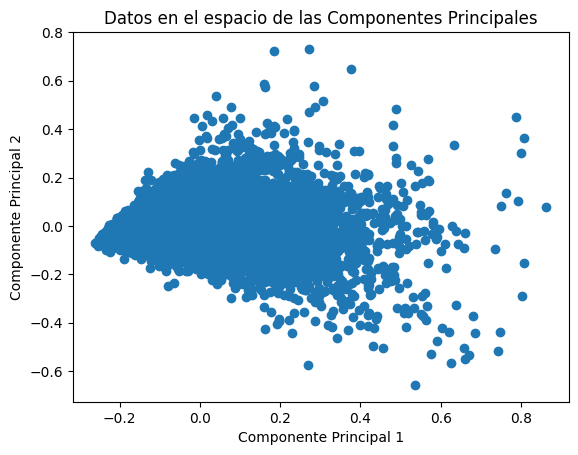

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

transformed_data = pca.transform(df_scaled)

# Visualiza la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", explained_variance)

# Visualiza los datos en el espacio de las componentes principales
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos en el espacio de las Componentes Principales')
plt.show()


In [ ]:
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlabel('Número de componentes')
#plt.ylabel('Varianza explicada acumulada')
#plt.title('Criterio del codo')
#plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

features = df_scaled.columns.tolist()

# Separating out the features
x = df_scaled.loc[:, features].values

# Separating out the target
#y = df_scaled.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,5.066998,2.392935
1,-0.308703,-0.772402
2,-2.083143,-0.057717
3,0.320667,0.304385
4,0.902271,-1.514692
...,...,...
7671,-1.063815,-1.177073
7672,3.324422,0.703326
7673,-0.751301,0.153724
7674,-0.873137,0.019375


In [ ]:
finalDf = pd.concat([principalDf, df_merged[['Nombre Departamento']]], axis = 1)
finalDf = pd.concat([finalDf, df_merged[['AÑO']]], axis = 1)
finalDf = pd.concat([finalDf, df_merged[['CODIGO_DANE']]], axis = 1)

finalDf

,principal component 1,principal component 2,Nombre Departamento,AÑO,CODIGO_DANE
0,5.066998,2.392935,ANTIOQUIA,2017,5001
1,-0.308703,-0.772402,ANTIOQUIA,2017,5002
2,-2.083143,-0.057717,ANTIOQUIA,2017,5004
3,0.320667,0.304385,ANTIOQUIA,2017,5021
4,0.902271,-1.514692,ANTIOQUIA,2017,5030
...,...,...,...,...,...
7671,-1.063815,-1.177073,VAUPÉS,2023,97666
7672,3.324422,0.703326,VICHADA,2023,99001
7673,-0.751301,0.153724,VICHADA,2023,99524
7674,-0.873137,0.019375,VICHADA,2023,99624


In [ ]:
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1)
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)

#targets = ['ANTIOQUIA', 'BOYACÁ', 'CUNDINAMARCA']
#colors = ['r', 'g', 'b']
#for target, color in zip(targets,colors):
#    indicesToKeep = finalDf['Nombre Departamento'] == target
#    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#               , finalDf.loc[indicesToKeep, 'principal component 2']
#               , c = color
#               , s = 50)
#ax.legend(targets)
#ax.grid()

In [ ]:
#len(set(list(finalDf['Nombre Departamento'])))

In [ ]:
#import seaborn as sns
#plt.figure(figsize=(16,10))
#sns.scatterplot(
#    x="principal component 1", y="principal component 2",
#    hue="Nombre Departamento",
#    palette=sns.color_palette("hls", 34),
#    data=finalDf,
#    legend="full",
#    alpha=0.3
#)


In [ ]:
import plotly.express as px

# Crear el gráfico de dispersión con Plotly Express
fig = px.scatter(finalDf, x="principal component 1", y="principal component 2",
                 color="Nombre Departamento",
                 opacity=0.3)

# Ajustar el tamaño del gráfico
fig.update_layout(
    width=1500,
    height=800
)

# Mostrar el gráfico
fig.show()


In [ ]:
# @title Gráfica de dispersión por año { run: "auto" }
Year = 2019 # @param {type:"number"}
tabla = finalDf[finalDf['AÑO']==Year]
fig = px.scatter(tabla, x="principal component 1", y="principal component 2",
                 color="Nombre Departamento",
                 opacity=0.3)

# Ajustar el tamaño del gráfico
fig.update_layout(
    width=1500,
    height=800
)

# Mostrar el gráfico
fig.show()

In [ ]:
finalDf

,principal component 1,principal component 2,Nombre Departamento,AÑO,CODIGO_DANE
0,5.066998,2.392935,ANTIOQUIA,2017,5001
1,-0.308703,-0.772402,ANTIOQUIA,2017,5002
2,-2.083143,-0.057717,ANTIOQUIA,2017,5004
3,0.320667,0.304385,ANTIOQUIA,2017,5021
4,0.902271,-1.514692,ANTIOQUIA,2017,5030
...,...,...,...,...,...
7671,-1.063815,-1.177073,VAUPÉS,2023,97666
7672,3.324422,0.703326,VICHADA,2023,99001
7673,-0.751301,0.153724,VICHADA,2023,99524
7674,-0.873137,0.019375,VICHADA,2023,99624


In [ ]:
df_final

,POBLACION,DELITOS SEXUALES,HOMICIDIO,HOMICIDIO ACCIDENTE TRANSITO,HURTO A PERSONAS,HURTO COMERCIO,HURTO ENTIDADES FINANCIERAS,HURTO RESIDENCIAS,HURTO VEHICULOS,LESIONES ACCIDENTES TRANSITO,LESIONES PERSONALES,VIOLENCIA INTRAFAMILIAR,Num13_ConsumoyporteSPA,Num2_IncumplirordenPolicía,Num6_Portararmas,Num8_PorteSustanciasProhibidas,Otros
0,2385018,70.4,24.0,9.9,747.4,184.5,0.5,75.7,210.6,137.0,262.6,311.7,0.0,22.6,23.8,74.2,279.6
1,20437,78.3,9.8,19.6,93.0,39.1,0.0,122.3,29.4,9.8,190.8,127.2,0.0,0.0,234.9,4.9,102.8
2,2652,75.4,37.7,0.0,0.0,0.0,0.0,75.4,0.0,0.0,0.0,75.4,0.0,0.0,37.7,0.0,150.8
3,4600,0.0,43.5,0.0,43.5,87.0,0.0,108.7,65.2,21.7,173.9,239.1,0.0,0.0,326.1,173.9,652.2
4,29663,111.2,43.8,13.5,111.2,84.3,0.0,64.1,43.8,47.2,438.3,219.1,0.0,30.3,87.7,13.5,232.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,2543,196.6,39.3,0.0,0.0,0.0,0.0,39.3,0.0,0.0,157.3,196.6,0.0,0.0,39.3,0.0,157.3
7672,22218,99.0,36.0,9.0,270.1,81.0,0.0,252.0,76.5,4.5,310.6,193.5,94.5,778.6,985.7,180.0,1296.2
7673,10992,27.3,9.1,9.1,45.5,9.1,0.0,81.9,9.1,18.2,81.9,300.2,45.5,18.2,336.6,18.2,527.7
7674,4555,87.8,22.0,43.9,65.9,0.0,0.0,65.9,0.0,0.0,87.8,87.8,153.7,175.6,197.6,0.0,307.4


In [ ]:
df_scaled

,POBLACION,DELITOS SEXUALES,HOMICIDIO,HOMICIDIO ACCIDENTE TRANSITO,HURTO A PERSONAS,HURTO COMERCIO,HURTO ENTIDADES FINANCIERAS,HURTO RESIDENCIAS,HURTO VEHICULOS,LESIONES ACCIDENTES TRANSITO,LESIONES PERSONALES,VIOLENCIA INTRAFAMILIAR,Num13_ConsumoyporteSPA,Num2_IncumplirordenPolicía,Num6_Portararmas,Num8_PorteSustanciasProhibidas,Otros
0,0.301528,0.166706,0.058824,0.040624,0.400214,0.265621,0.022321,0.085181,0.239563,0.142028,0.190718,0.171707,0.000000,0.001427,0.004669,0.031283,0.036757
1,0.002449,0.185413,0.024020,0.080427,0.049799,0.056291,0.000000,0.137617,0.033443,0.010160,0.138572,0.070071,0.000000,0.000000,0.046079,0.002066,0.013514
2,0.000200,0.178546,0.092402,0.000000,0.000000,0.000000,0.000000,0.084843,0.000000,0.000000,0.000000,0.041536,0.000000,0.000000,0.007395,0.000000,0.019824
3,0.000446,0.000000,0.106618,0.000000,0.023293,0.125252,0.000000,0.122313,0.074167,0.022496,0.126298,0.131714,0.000000,0.000000,0.063969,0.073317,0.085739
4,0.003616,0.263320,0.107353,0.055396,0.059545,0.121365,0.000000,0.072128,0.049824,0.048932,0.318324,0.120696,0.000000,0.001913,0.017203,0.005692,0.030578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7671,0.000186,0.465546,0.096324,0.000000,0.000000,0.000000,0.000000,0.044222,0.000000,0.000000,0.114242,0.108302,0.000000,0.000000,0.007709,0.000000,0.020679
7672,0.002674,0.234430,0.088235,0.036931,0.144632,0.116614,0.000000,0.283560,0.087021,0.004665,0.225579,0.106594,0.030831,0.049161,0.193358,0.075889,0.170400
7673,0.001254,0.064646,0.022304,0.037341,0.024364,0.013101,0.000000,0.092157,0.010351,0.018868,0.059481,0.165372,0.014845,0.001149,0.066028,0.007673,0.069372
7674,0.000440,0.207909,0.053922,0.180140,0.035288,0.000000,0.000000,0.074153,0.000000,0.000000,0.063766,0.048367,0.050145,0.011087,0.038762,0.000000,0.040411


In [ ]:
component_loadings = pca.components_
weights = np.abs(component_loadings) / np.sum(np.abs(component_loadings), axis=1, keepdims=True)
weights[:1]

array([[0.04308732, 0.05245109, 0.00021664, 0.04740643, 0.1019896 ,
        0.09347509, 0.00987105, 0.08911627, 0.05741727, 0.07819713,
        0.09435037, 0.07864278, 0.04747563, 0.01668933, 0.06659128,
        0.05426754, 0.06875518]])

In [ ]:
# dictionary of coefficients
coefficient_dict = dict(zip(list(df_scaled.columns), list(weights[:1][0])))


# apply weighting coefficients
for column_name, coefficient in coefficient_dict.items():
    df_scaled[column_name] = df_scaled[column_name] * coefficient

In [ ]:
quant_cols=list(df_scaled.columns)
finalDf['composite_index'] = df_scaled[quant_cols].sum(axis=1) / len(quant_cols)

finalDf.describe()

,principal component 1,principal component 2,AÑO,CODIGO_DANE,composite_index
count,7.676000e+03,7.676000e+03,7676.000000,7676.000000,7676.000000
mean,-2.221603e-17,5.924275e-17,2020.000130,37760.010552,0.003888
std,2.037516e+00,1.308054e+00,2.000358,25766.652216,0.002536
min,-3.078384e+00,-7.552209e+00,2017.000000,5001.000000,0.000002
25%,-1.480717e+00,-6.124923e-01,2018.000000,15660.000000,0.002030
50%,-3.985900e-01,2.493140e-02,2020.000000,25793.000000,0.003393
75%,1.020444e+00,4.765467e-01,2022.000000,63470.000000,0.005191
max,1.495613e+01,1.565945e+01,2023.000000,99773.000000,0.018656


In [ ]:
std = finalDf['composite_index'].std()
mean = finalDf['composite_index'].mean()

finalDf['composite_index_std'] = (finalDf['composite_index'] - mean) / std

finalDf[['Nombre Departamento','AÑO','principal component 1', 'principal component 2', 'composite_index', 'composite_index_std']]

,Nombre Departamento,AÑO,principal component 1,principal component 2,composite_index,composite_index_std
0,ANTIOQUIA,2017,5.066995,2.387091,0.009297,2.132678
1,ANTIOQUIA,2017,-0.308797,-0.772624,0.003627,-0.102887
2,ANTIOQUIA,2017,-2.083127,-0.057331,0.001299,-1.021022
3,ANTIOQUIA,2017,0.320705,0.307616,0.003968,0.031381
4,ANTIOQUIA,2017,0.902191,-1.515744,0.005310,0.560465
...,...,...,...,...,...,...
7671,VAUPÉS,2023,-1.063871,-1.178639,0.002919,-0.382214
7672,VICHADA,2023,3.324267,0.712369,0.007713,1.508161
7673,VICHADA,2023,-0.751266,0.155120,0.002832,-0.416610
7674,VICHADA,2023,-0.873255,0.016950,0.002790,-0.433031


In [ ]:
finalDf['composite_index'][finalDf['Nombre Departamento']=='AMAZONAS']

1083    0.009641
1084    0.003711
2179    0.009381
2180    0.006425
3276    0.011045
3277    0.004466
4372    0.006861
4373    0.003495
5468    0.007977
5469    0.003310
6565    0.007571
6566    0.002247
7662    0.008420
7663    0.002589
Name: composite_index, dtype: float64

In [ ]:
nuevo_df = finalDf.groupby(['CODIGO_DANE', 'AÑO'])[['composite_index','composite_index_std']].mean().reset_index()

# Mostrar el nuevo DataFrame
nuevo_df

,CODIGO_DANE,AÑO,composite_index,composite_index_std
0,5001,2017,0.009297,2.132678
1,5001,2018,0.011115,2.849350
2,5001,2019,0.012389,3.351744
3,5001,2020,0.009725,2.301336
4,5001,2021,0.011043,2.821144
...,...,...,...,...
7671,99773,2019,0.000535,-1.322186
7672,99773,2020,0.000491,-1.339383
7673,99773,2021,0.000302,-1.413903
7674,99773,2022,0.000407,-1.372560


In [ ]:
nuevo_df.to_csv('/content/drive/MyDrive/PCA/PCA_Capt.csv', index=False)